# 2022年度第3ターム「実験数学C」 第05回 11/08(火)4限

In [ ]:
# 必要な外部モジュールをインストール
!pip install numpy sympy matplotlib nptyping

In [11]:
# 必要なモジュールをインポートする
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from nptyping import Float, NDArray, Shape

## 6組のデータを $(0.0, 2.0), (0.2, 2.12), (0.4, 1.62), (0.6, 2.57), (0.8, 1.53), (1.0, 2.0)$ とする．

### 1. 回帰直線を求める．

-0.11714285714285563 2.031904761904761


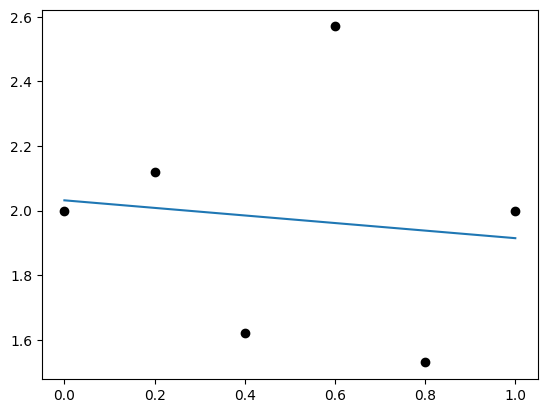

In [15]:
# 与えられた6点(0.0, 2.0), (0.2, 2.12), (0.4, 1.62), (0.6, 2.57), (0.8, 1.53), (1.0, 2.0)から回帰直線を求める
# 座標をx、yそれぞれベクトルとして定義
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])  # 内積計算のためにnp.arrayで作る。
y = np.array([2.0, 2.12, 1.62, 2.57, 1.53, 2.0])

# 計算内容を関数として定義
def reg1dim(x, y):
    n = len(x)
    a = (np.dot(x, y) - y.sum() * x.sum() / n) / ((x**2).sum() - x.sum() ** 2 / n)
    b = (y.sum() - a * x.sum()) / n
    return a, b


# 計算結果をabとして入れ込む
a, b = reg1dim(x, y)
# y=ax+bのパラメータabを表示
print(a, b)
# グラフを描画
plt.scatter(x, y, color="k")
plt.plot([0, x.max()], [b, a * x.max() + b])  # (0, b)地点から(xの最大値,ax + b)地点までの線
plt.show()

### 2. Lagrangeの $5$ 次補間多項式を求める．

必要な関数を定義する．

In [17]:
def lix(xs: NDArray[Shape["1, 6"], Float], i: int, x: sp.Symbol) -> sp.Expr:
    """Lagrange補間で用いるl_i(x)関数

    Args:
        xs (NDArray[Shape["1, 6"]): x座標のリスト
        i (int): 添え字
        x (sp.Symbol): 変数

    Returns:
        sp.Expr: l_i(x)
    """
    numerator, denominator = 1.0, 1.0
    for k in range(len(xs)):
        if k != i:
            numerator *= x - xs[k]
            denominator *= xs[i] - xs[k]

    return numerator / denominator


def lagrange(
    x: sp.Symbol, xs: NDArray[Shape["1, 6"], Float], ys: NDArray[Shape["1, 6"], Float]
) -> sp.Expr:
    """Lagrange補間を用いて(n-1)次多項式を求める

    Args:
        x (sp.Symbol): 変数
        xs (NDArray[Shape["1, 6"], Float]): x座標のリスト
        ys (NDArray[Shape["1, 6"], Float]): y座標のリスト

    Returns:
        sp.Expr: 補間した多項式
    """
    # Lagrange補間で用いるl_i(x)を求める
    lixs = [lix(xs, i, x) for i in range(len(xs))]
    # 補間多項式を求める
    polynomial = sp.expand(np.dot(ys, lixs))

    return polynomial

324.21875*x**5 - 791.927083333333*x**4 + 669.21875*x**3 - 226.447916666667*x**2 + 24.9375*x + 2.0


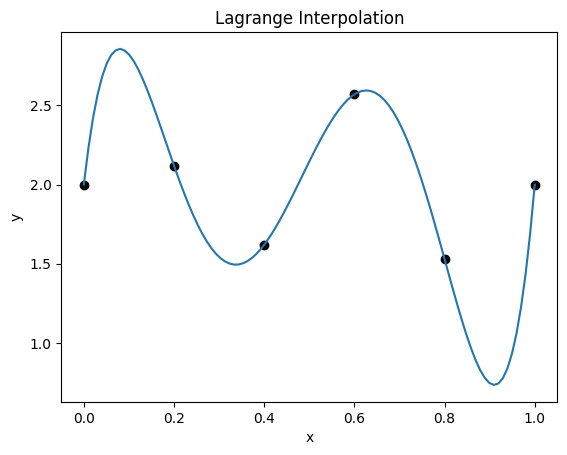

In [18]:
# Lagrange補間を用いて，与えられた6点(0.0, 2.0), (0.2, 2.12), (0.4, 1.62), (0.6, 2.57), (0.8, 1.53), (1.0, 2.0)から5次多項式を求める
# 変数xを定義する
x = sp.Symbol("x")
# x座標
xs = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
# y座標
ys = np.array([2.0, 2.12, 1.62, 2.57, 1.53, 2.0])

# Lagrange補間を用いて，与えられた6点から5次多項式を求める
polynomial = lagrange(x, xs, ys)
print(polynomial)

# 求めた多項式のグラフを描画する
xplots = np.linspace(0.0, 1.0, 100)
yplots = [polynomial.subs(x, xi) for xi in xplots]
plt.title("Lagrange Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(xs, ys, color="black")
plt.plot(xplots, yplots)
plt.show()